#### <font color="#03997A"> Diplomado en Ciencia de datos UNAM </font>

##### <font color="#03997A"> Dr: Alejandro Pimentel  </font>

##### <font color="#03997A"> Modulo 8 Introducción al Deep Learning </font>

##### <font color="#03997A"> Tema 3 Representación de operaciones matriciales en lenguaje tensorial (aplicado a clasicación de imagenes de numeros)    Alumno: Ibarra Ramírez Sergio </font>

La data será tomada de: MNIST handwritten digit database, Yann LeCun, Corinna Cortes and Chris Burges

Se descargará la data de los digitos escritos a mano

In [24]:
import requests

urls = [
    "http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz",
    "http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz",
    "http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz",
    "http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz"
]

for url in urls:
    filename = url.split("/")[-1]  # Extract the filename from the URL
    response = requests.get(url)
    with open(filename, "wb") as f:
        f.write(response.content)
    print(f"Downloaded {filename}")


Downloaded train-images-idx3-ubyte.gz
Downloaded train-labels-idx1-ubyte.gz
Downloaded t10k-images-idx3-ubyte.gz
Downloaded t10k-labels-idx1-ubyte.gz


Se deben descomprimir los datos pues están en modo .gz

In [25]:
import idx2numpy

ruta_train_images = 'train-images-idx3-ubyte'
ruta_train_labels = 'train-labels-idx1-ubyte'
ruta_test_images = 't10k-images-idx3-ubyte'
ruta_test_labels = 't10k-labels-idx1-ubyte'

train_images = idx2numpy.convert_from_file(ruta_train_images)
train_labels = idx2numpy.convert_from_file(ruta_train_labels)
test_images = idx2numpy.convert_from_file(ruta_test_images)
test_labels = idx2numpy.convert_from_file(ruta_test_labels)

In [26]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [27]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Para intentar visualizar los datos 

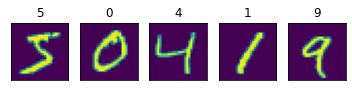

In [28]:
import matplotlib.pyplot as plt

imagenes_mostrar = train_images[:5] # unas 5
labels_mostrar = train_labels[:5]
for i, (img,label) in enumerate(zip(imagenes_mostrar,labels_mostrar)):
    plt.subplot(151 + i) #esto es para que las ponga lado a lado, se interpreta cada dígito (1: renglon, 5:columnas, x: el indice en el que se va poniendo)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.title(label)

In [29]:
train_images.reshape([-1,784]).shape

(60000, 784)

Volvemos a importar los datos y normalizarlos 

In [30]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import normalize

X,y = fetch_openml('mnist_784', as_frame=False, return_X_y=True)

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [31]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
X.shape

(70000, 784)

In [33]:
y.shape

(70000,)

In [34]:
X = normalize(X)

In [35]:
X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

In [36]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
X_train.shape

(60000, 784)

In [38]:
y_train.shape

(60000,)

##### Vamos a hacer Encoding de nuestros datos de entrnamiento 

In [39]:
from sklearn.preprocessing import OneHotEncoder

codificador = OneHotEncoder(handle_unknown='ignore',sparse=False)
y_train = codificador.fit_transform(y_train.reshape(-1,1))
y_test = codificador.transform(y_test.reshape(-1,1))

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#### Uso de Tensorflow para operaciones matriciales en redes neuronales 

In [40]:
import tensorflow as tf

##### Preparación del dataset

In [41]:
X_train = tf.constant(X_train, dtype=tf.float32)
X_test = tf.constant(X_test, dtype=tf.float32)
y_train = tf.constant(y_train, dtype=tf.float32)
y_test = tf.constant(y_test, dtype=tf.float32)

In [42]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(784,), dtype=tf.float32, name=None), TensorSpec(shape=(10,), dtype=tf.float32, name=None))>

In [43]:
batch_size = 100 # Hiperparámetro
train_dataset = train_dataset.shuffle(batch_size).batch(batch_size)

### Si no se normaliza la entrada el calculo del gradiente, es decir, de la pendiente puede provocar "pasos muy grandes" en cierta dirección y "pasos muy chicos" en otra, lo que podría dificultar y/o impedir la conversión del algoritmo del descenco del gradiente

Otra cosa que se debe verificar es el learning rate 

## Red multicapa  

Se va requerir un juego de pesos por cada capa que se agrega

In [19]:
b1 = tf.Variable(tf.random.normal([100]))
W1 = tf.Variable(tf.random.normal([784,100]))
W1

<tf.Variable 'Variable:0' shape=(784, 100) dtype=float32, numpy=
array([[-0.29167536, -0.41995493,  1.0119617 , ..., -0.47638288,
         0.2933027 ,  1.0440025 ],
       [ 1.5352141 ,  2.0317655 , -0.95383745, ..., -0.08907662,
         1.6766299 ,  1.2369276 ],
       [-0.57103926, -1.490749  ,  0.21295835, ..., -2.4531808 ,
         0.16458488,  1.4764191 ],
       ...,
       [-0.16405097, -0.26322296,  2.965719  , ..., -0.16414678,
         0.25119546, -1.7322811 ],
       [ 0.58999014,  1.2022154 ,  0.11109366, ..., -2.00684   ,
        -1.6691767 , -0.58229494],
       [ 0.20810874,  0.29348165, -0.60216534, ...,  0.56528324,
         0.66681886, -1.0743164 ]], dtype=float32)>

In [20]:
b2 = tf.Variable(tf.random.normal([10]))
W2 = tf.Variable(tf.random.normal([100,10]))
W2

<tf.Variable 'Variable:0' shape=(100, 10) dtype=float32, numpy=
array([[ 2.45277330e-01,  3.45116198e-01, -3.41964573e-01,
        -1.01242709e+00, -5.53543270e-01, -1.15337408e+00,
         1.37621999e+00, -1.39781260e+00, -1.04342186e+00,
        -4.64849353e-01],
       [ 1.13468587e+00,  4.43222165e-01,  9.89424050e-01,
        -3.04644614e-01,  4.28517938e-01, -7.99076706e-02,
        -1.05278563e+00, -8.66714239e-01, -3.40859666e-02,
        -1.75310576e+00],
       [ 1.74385607e+00,  1.18213606e+00,  7.25450873e-01,
        -1.92813918e-01,  1.90840773e-02,  5.81369221e-01,
         5.23419797e-01,  1.41246930e-01,  7.60499001e-01,
         1.69682264e-01],
       [ 1.57605428e-02, -1.85647750e+00,  6.53909326e-01,
         7.53739536e-01,  1.63813442e-01,  1.77272606e+00,
        -6.40285790e-01,  3.05746943e-01, -1.05290556e+00,
         8.19672227e-01],
       [-8.66268218e-01, -2.12488800e-01, -6.17010713e-01,
        -1.26475358e+00, -3.54583859e-01,  2.44931996e-01,
      

Recordar que es necesario tener entre capa y capa una función de activación no lineal 

In [21]:
optimizador = tf.keras.optimizers.experimental.SGD(learning_rate=0.1)


In [22]:
epochs = 10
for _ in range(epochs):
  loss_epoch = 0
  for x,y in train_dataset: # Es un batch
    with tf.GradientTape() as gt:
      # Forward
      operacion_matricial = tf.matmul(x,W1)+b1 # Primera capa
      capa1 = tf.nn.relu(operacion_matricial)

      capa2 = tf.matmul(capa1,W2)+b2

      probs = tf.nn.softmax(capa2)

        # Loss
      prob_as = probs*y # Probabilidades de las clases correctas (a)
      vec_probs = tf.reduce_sum(prob_as,axis=1)
      x_ent = -tf.math.log(vec_probs)
      loss = tf.reduce_mean(x_ent)

      # Backward
      optimizador.minimize(loss,[W1,b1,W2,b2],gt) # No olvidar cuáles son los parámetros a ajustar

    loss_epoch += loss/len(train_dataset)
  print(loss_epoch)

tf.Tensor(nan, shape=(), dtype=float32)
tf.Tensor(nan, shape=(), dtype=float32)
tf.Tensor(nan, shape=(), dtype=float32)
tf.Tensor(nan, shape=(), dtype=float32)
tf.Tensor(nan, shape=(), dtype=float32)
tf.Tensor(nan, shape=(), dtype=float32)
tf.Tensor(nan, shape=(), dtype=float32)
tf.Tensor(nan, shape=(), dtype=float32)
tf.Tensor(nan, shape=(), dtype=float32)
tf.Tensor(nan, shape=(), dtype=float32)


In [23]:
# Salida
operacion_matricial = tf.matmul(X_test,W1)+b1
capa1 = tf.nn.relu(operacion_matricial)

capa2 = tf.matmul(capa1,W2)+b2

probs = tf.nn.softmax(capa2)

# Comparación
max_preds = tf.argmax(probs,1)
max_trues = tf.argmax(y_test,1)

numCorrectos = tf.equal(max_preds,max_trues)
acc = tf.reduce_mean(tf.cast(numCorrectos,tf.float32))
print(acc)

tf.Tensor(0.098, shape=(), dtype=float32)


### En nuestro caso el no NORMALIZAR LOS DATOS redujo el accuracy de un ~90% a un ~9% lo cual evidentemente refleja dificultades encontrando puntos optimos adecuados 

 # Agregando función de activación a la segunda capa 

In [44]:
epochs = 10
for _ in range(epochs):
  loss_epoch = 0
  for x,y in train_dataset: # Es un batch
    with tf.GradientTape() as gt:
      # Forward
      operacion_matricial = tf.matmul(x,W1)+b1 # Primera capa
      capa1 = tf.nn.relu(operacion_matricial)

      operacion_matricial2 = tf.matmul(capa1,W2)+b2 # Primera capa
      capa2 = tf.nn.relu(operacion_matricial2)

      probs = tf.nn.softmax(capa2)

        # Loss
      prob_as = probs*y # Probabilidades de las clases correctas (a)
      vec_probs = tf.reduce_sum(prob_as,axis=1)
      x_ent = -tf.math.log(vec_probs)
      loss = tf.reduce_mean(x_ent)

      # Backward
      optimizador.minimize(loss,[W1,b1,W2,b2],gt) # No olvidar cuáles son los parámetros a ajustar

    loss_epoch += loss/len(train_dataset)
  print(loss_epoch)

tf.Tensor(nan, shape=(), dtype=float32)
tf.Tensor(nan, shape=(), dtype=float32)
tf.Tensor(nan, shape=(), dtype=float32)
tf.Tensor(nan, shape=(), dtype=float32)
tf.Tensor(nan, shape=(), dtype=float32)
tf.Tensor(nan, shape=(), dtype=float32)
tf.Tensor(nan, shape=(), dtype=float32)
tf.Tensor(nan, shape=(), dtype=float32)
tf.Tensor(nan, shape=(), dtype=float32)
tf.Tensor(nan, shape=(), dtype=float32)


In [46]:
# Salida
operacion_matricial = tf.matmul(X_test,W1)+b1
capa1 = tf.nn.relu(operacion_matricial)

capa1 = tf.nn.relu(operacion_matricial)

operacion_matricial2 = tf.matmul(capa1,W2)+b2 # Primera capa
capa2 = tf.nn.relu(operacion_matricial2)


probs = tf.nn.softmax(capa2)

# Comparación
max_preds = tf.argmax(probs,1)
max_trues = tf.argmax(y_test,1)

numCorrectos = tf.equal(max_preds,max_trues)
acc = tf.reduce_mean(tf.cast(numCorrectos,tf.float32))
print(acc)

tf.Tensor(0.098, shape=(), dtype=float32)


En este caso agregar una función RELU a la segunda capa no mejoró la accuracy de la clasificación de números. Esto puede deberse a que la última capa de nuestra red es de tipo SOFTMAX y está recibiendo la salida de la capa2, en caso de que esta salida tenga valores muy pequeños (provocados por el caso de la red por una segunda funcón tipo RELU) esto podría afectar al calculo de la probabilidad final de cada elemento.
 Se pudiera entender como si SOFTMAX fuera yá la función de activación de la segunda capa y ya no sería neceista agregar otra bajo función de activación a esta arquitectura, solo en el caso, por ejemplo de agregar una tercera capa con solo SOFTMAX y una segunda con RELU. 
 En este caso el agregar esa segunda capa con funcion de activacion tipo RELU redujo mucho el accuracy del modelo e hizo que se tardara mucho en converger

### Uso de un modelo en Tensorflow 

In [47]:
# Defino las capas y conexiones
entradas = tf.keras.Input(shape=(784,)) # No hay aún matriz de pesos

capa1 = tf.keras.layers.Dense(100,activation="relu")(entradas) # Infiere la forma de la matriz
#capa2 = tf.keras.layers.Dense(50,activation="sigmoid")(capa1)
capa3 = tf.keras.layers.Dense(10,activation="softmax")(capa1)

modelo_multicapa = tf.keras.Model(inputs = entradas, outputs = capa3)

modelo_multicapa.compile(optimizer="SGD",
               loss="categorical_crossentropy")

modelo_multicapa.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
modelo_multicapa.compile(optimizer="SGD",
               loss="categorical_crossentropy",
               metrics=["accuracy"])

In [49]:
loss_multicapa, acc_multicapa = modelo_multicapa.evaluate(X_test,y_test)

print(acc_multicapa)

313/313 [==============================] - 14s 3ms/step - loss: 2.3040 - accuracy: 0.1212
0.12120000272989273
